In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string
from collections import Counter


nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/meerkats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_table('data/SMSSpamCollection',
                    sep = '\t',
                    header = None,
                    names = ['label', 'sms_message'])
df.head(10)

label                                        sms_message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

In [3]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df['length'] = df['sms_message'].map(lambda x: len(x))
df.head()

label                                        sms_message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

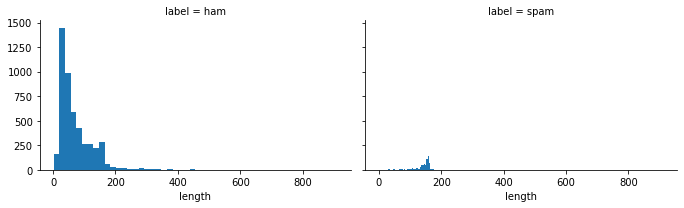

In [5]:
g = sns.FacetGrid(df, col='label', aspect=1.6)
g.map(plt.hist, "length", bins=50)

In [6]:
df = df.replace(['ham','spam'],[0,1])
df.head()

label                                        sms_message  length
0      0  Go until jurong point, crazy.. Available only ...     111
1      0                      Ok lar... Joking wif u oni...      29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      0  U dun say so early hor... U c already then say...      49
4      0  Nah I don't think he goes to usf, he lives aro...      61

In [7]:
def remove_stopwords(msg):
    translation = str.maketrans('','',string.punctuation)
    msg = msg.translate(translation)
    msg = [word for word in msg.split() if word.lower() not in stopwords.words('english')]
    return " ".join(msg)

In [12]:
df['sms_message'] = df['sms_message'].apply(remove_stopwords)
df.head()

label                                        sms_message  length
0      0  Go jurong point crazy Available bugis n great ...     111
1      0                            Ok lar Joking wif u oni      29
2      1  Free entry 2 wkly comp win FA Cup final tkts 2...     155
3      0                U dun say early hor U c already say      49
4      0        Nah dont think goes usf lives around though      61

In [13]:
msg = pd.DataFrame(df['sms_message'])
lbl = pd.DataFrame(df['label'])

In [15]:
counts = Counter()
for i in range(len(msg)):
    for word in msg.values[i][0].split(" "):
        counts[word] += 1

In [24]:
dict(counts)

{'Go': 14,
 'jurong': 1,
 'point': 12,
 'crazy': 12,
 'Available': 3,
 'bugis': 6,
 'n': 140,
 'great': 86,
 'world': 20,
 'la': 7,
 'e': 73,
 'buffet': 2,
 'Cine': 1,
 'got': 206,
 'amore': 1,
 'wat': 68,
 'Ok': 147,
 'lar': 38,
 'Joking': 1,
 'wif': 26,
 'u': 786,
 'oni': 4,
 'Free': 46,
 'entry': 25,
 '2': 482,
 'wkly': 10,
 'comp': 11,
 'win': 40,
 'FA': 4,
 'Cup': 3,
 'final': 13,
 'tkts': 4,
 '21st': 3,
 'May': 19,
 '2005': 3,
 'Text': 43,
 '87121': 4,
 'receive': 35,
 'questionstd': 2,
 'txt': 77,
 'rateTCs': 2,
 'apply': 29,
 '08452810075over18s': 2,
 'U': 346,
 'dun': 46,
 'say': 84,
 'early': 32,
 'hor': 2,
 'c': 46,
 'already': 87,
 'Nah': 10,
 'dont': 223,
 'think': 118,
 'goes': 26,
 'usf': 10,
 'lives': 4,
 'around': 60,
 'though': 25,
 'FreeMsg': 9,
 'Hey': 96,
 'darling': 4,
 '3': 66,
 'weeks': 19,
 'word': 34,
 'back': 141,
 'Id': 9,
 'like': 232,
 'fun': 30,
 'still': 138,
 'Tb': 1,
 'ok': 119,
 'XxX': 2,
 'std': 9,
 'chgs': 1,
 'send': 153,
 '£150': 27,
 'rcv': 2,
 '

In [47]:
vocabulary = sorted(counts, key = counts.get, reverse = True)
vocabulary

['u',
 '2',
 'call',
 'U',
 'get',
 'Im',
 'ur',
 '4',
 'ltgt',
 'know',
 'go',
 'like',
 'dont',
 'come',
 'got',
 'time',
 'day',
 'want',
 'Ill',
 'lor',
 'Call',
 'home',
 'send',
 'one',
 'going',
 'need',
 'Ok',
 'good',
 'love',
 'back',
 'n',
 'still',
 'text',
 'im',
 'later',
 'see',
 'da',
 'ok',
 'think',
 'ü',
 'free',
 'FREE',
 'r',
 'today',
 'Sorry',
 'week',
 'phone',
 'mobile',
 'cant',
 'tell',
 'take',
 'much',
 'night',
 'way',
 'Hey',
 'reply',
 'work',
 'give',
 'make',
 'new',
 'number',
 'already',
 'great',
 'right',
 'ask',
 'Hi',
 'say',
 'amp',
 'tomorrow',
 '1',
 'well',
 'said',
 'claim',
 'txt',
 'Oh',
 'Good',
 'message',
 'didnt',
 'Txt',
 'e',
 'prize',
 'meet',
 'really',
 'stop',
 'ill',
 'wat',
 'Pls',
 'msg',
 'would',
 'contact',
 '3',
 'Please',
 'find',
 'miss',
 'morning',
 'pick',
 'life',
 'STOP',
 'every',
 'sure',
 'sent',
 'Dont',
 'something',
 'Ur',
 'anything',
 'care',
 'around',
 'Yes',
 'buy',
 'please',
 'next',
 'us',
 'place',
 '

In [51]:
vsize = len(vocabulary)
idx = {}
for i, word in enumerate(vocabulary):
    idx[word] = i
    
idx

{'u': 0,
 '2': 1,
 'call': 2,
 'U': 3,
 'get': 4,
 'Im': 5,
 'ur': 6,
 '4': 7,
 'ltgt': 8,
 'know': 9,
 'go': 10,
 'like': 11,
 'dont': 12,
 'come': 13,
 'got': 14,
 'time': 15,
 'day': 16,
 'want': 17,
 'Ill': 18,
 'lor': 19,
 'Call': 20,
 'home': 21,
 'send': 22,
 'one': 23,
 'going': 24,
 'need': 25,
 'Ok': 26,
 'good': 27,
 'love': 28,
 'back': 29,
 'n': 30,
 'still': 31,
 'text': 32,
 'im': 33,
 'later': 34,
 'see': 35,
 'da': 36,
 'ok': 37,
 'think': 38,
 'ü': 39,
 'free': 40,
 'FREE': 41,
 'r': 42,
 'today': 43,
 'Sorry': 44,
 'week': 45,
 'phone': 46,
 'mobile': 47,
 'cant': 48,
 'tell': 49,
 'take': 50,
 'much': 51,
 'night': 52,
 'way': 53,
 'Hey': 54,
 'reply': 55,
 'work': 56,
 'give': 57,
 'make': 58,
 'new': 59,
 'number': 60,
 'already': 61,
 'great': 62,
 'right': 63,
 'ask': 64,
 'Hi': 65,
 'say': 66,
 'amp': 67,
 'tomorrow': 68,
 '1': 69,
 'well': 70,
 'said': 71,
 'claim': 72,
 'txt': 73,
 'Oh': 74,
 'Good': 75,
 'message': 76,
 'didnt': 77,
 'Txt': 78,
 'e': 79,
 'p

In [55]:
def conv_to_vec(msg):
    wrd_vec = np.zeros(vsize)
    for word in msg.split(" "):
        if idx.get(word) is None:
            continue
        else:
            wrd_vec[idx.get(word)] += 1
    return np.array(wrd_vec)

In [57]:
wrd_vec = np.zeros((len(msg), len(vocabulary)), dtype=np.int_)
for i, (_,msg_) in enumerate(msg.iterrows()):
    wrd_vec[i] = conv_to_vec(msg_[0])
    
wrd_vec[:60]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
wrd_vec.shape

(5572, 11426)